<h3 style="color:green">Постановка задачи
</h3>

Чтобы бороться с оттоком клиентов, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество анкет пользователей. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

Для решения задачи нужно:

- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;

- сформировать типичные портреты пользователей: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;

- проанализировать основные признаки, наиболее сильно влияющие на отток;

- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:


1) выделить целевые группы клиентов;

2) предложить меры по снижению оттока;

3) определить другие особенности взаимодействия с клиентами.

<h3 style="color:green">Импорт библиотек
</h3>

In [1]:
#Pandas для работы с таблицами
import pandas as pd
#numpy для удобства работы со списками
import numpy as np
#seaborn для быстрого построения графиков
import seaborn as sns
#matplotlib для построения графиков и использования дополнительного инструментария
import matplotlib.pyplot as plt
#train_test_split для разбивки данных на выборки
from sklearn.model_selection import train_test_split
#RandomForestClassifier для построения модели прогнозирования оттока
from sklearn.ensemble import RandomForestClassifier
#LogisticRegression для построения модели прогнозирования оттока
from sklearn.linear_model import LogisticRegression
#StandardScaler для стандартизирования данных признаков
from sklearn.preprocessing import StandardScaler
#accuracy_score, precision_score, recall_score, f1_score для оценки полученных прогнозов по валидационной выборке
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#dendrogram, linkage для построения и отображения модели кластеризации
from scipy.cluster.hierarchy import dendrogram, linkage
#KMeans для создания определённого количества кластеров по исходным признакам 
from sklearn.cluster import KMeans
# roc_auc_score для оценки предсказанных результатов классификации
from sklearn.metrics import roc_auc_score
#confusion_matrix для построения наглядной матрицы для наших моделей с количеством предсказанных значений
from sklearn.metrics import confusion_matrix
#Для лучшей читаемости будем отображать значения в таблицах с точностью одного знака после запятой
pd.options.display.float_format = '{:,.2f}'.format

<h3 style="color:green">Импорт данных
</h3>

Данные представлены csv файлом, в котором хранятся признаки и целевая переменная 'churn'(отток)

In [2]:
gym = pd.read_csv('C://Users\Sergei/2020_portfolio_projects/gym_churn.csv')
#вывод первых строк для оценки полученного датафрэйма
gym.head(5)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.23,5.00,3,0.02,0.00,0
1,0,1,0,0,1,12,1,31,113.20,12.00,7,1.92,1.91,0
2,0,1,1,0,1,1,0,28,129.45,1.00,2,1.86,1.74,0
3,0,1,1,1,1,12,1,33,62.67,12.00,2,3.21,3.36,0
4,1,1,1,1,1,1,0,26,198.36,1.00,3,1.11,1.12,0


<h3 style="color:green">Описание данных
</h3>

    'Churn' — факт оттока в текущем месяце;
    
Текущие поля в датасете:

Данные пользователя за предыдущий до проверки факта оттока месяц:

    'gender' — пол
    'Near_Location' — проживание или работа в районе, где находится фитнес-центр
    'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента)
    Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента)
    'Phone' — наличие контактного телефона
    'Age' — возраст
    'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах)
Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента

    'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)
    'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах)
    'Group_visits' — факт посещения групповых занятий
    'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента
    'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц
    'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон


<h3 style="color:green">Предобработка данных
</h3>

In [3]:
#к колонкам будет проще обращаться если привести их к нижнему регистру
gym.columns = [x.lower() for x in gym.columns]
#посмотрим к какому типу приведены данные в каждом столбце и есть ли в них пропуски
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
near_location                        4000 non-null int64
partner                              4000 non-null int64
promo_friends                        4000 non-null int64
phone                                4000 non-null int64
contract_period                      4000 non-null int64
group_visits                         4000 non-null int64
age                                  4000 non-null int64
avg_additional_charges_total         4000 non-null float64
month_to_end_contract                4000 non-null float64
lifetime                             4000 non-null int64
avg_class_frequency_total            4000 non-null float64
avg_class_frequency_current_month    4000 non-null float64
churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [4]:
#согласно описанию, данные в столбце Month_to_end_contract должны быть целыми, приведем к их нужному типу
gym['month_to_end_contract'] = gym['month_to_end_contract'].astype(int)

<h3 style="color:green">Исследовательский анализ данных (EDA)
</h3>

<h4 style="color:green">Средние значения и стандартные отклонения признаков
</h4>

In [5]:
#изучим средние значения признаков и их стандартные отклонения
describe = []
index = []
for column in gym.columns:
    describe.append(list(gym[column].describe()))
    index.append(column)
df = pd.DataFrame(data = describe, index = index, columns = gym['lifetime'].describe().reset_index()['index'])
df

index,count,mean,std,min,25%,50%,75%,max
gender,"4,000.00",0.51,0.50,0.00,0.00,1.00,1.00,1.00
near_location,"4,000.00",0.85,0.36,0.00,1.00,1.00,1.00,1.00
partner,"4,000.00",0.49,0.50,0.00,0.00,0.00,1.00,1.00
promo_friends,"4,000.00",0.31,0.46,0.00,0.00,0.00,1.00,1.00
phone,"4,000.00",0.90,0.30,0.00,1.00,1.00,1.00,1.00
contract_period,"4,000.00",4.68,4.55,1.00,1.00,1.00,6.00,12.00
group_visits,"4,000.00",0.41,0.49,0.00,0.00,0.00,1.00,1.00
age,"4,000.00",29.18,3.26,18.00,27.00,29.00,31.00,41.00
avg_additional_charges_total,"4,000.00",146.94,96.36,0.15,68.87,136.22,210.95,552.59
month_to_end_contract,"4,000.00",4.32,4.19,1.00,1.00,1.00,6.00,12.00


В данных таблица можно увидеть, что большинство признаков имеют большие стандартные отклонения от средних значений, это может говорить о разном поведении клиентов и то, что скорей всего их можно разделить на группы по признакам.

<h3 style="color:green">Распределение признаков 
</h3>

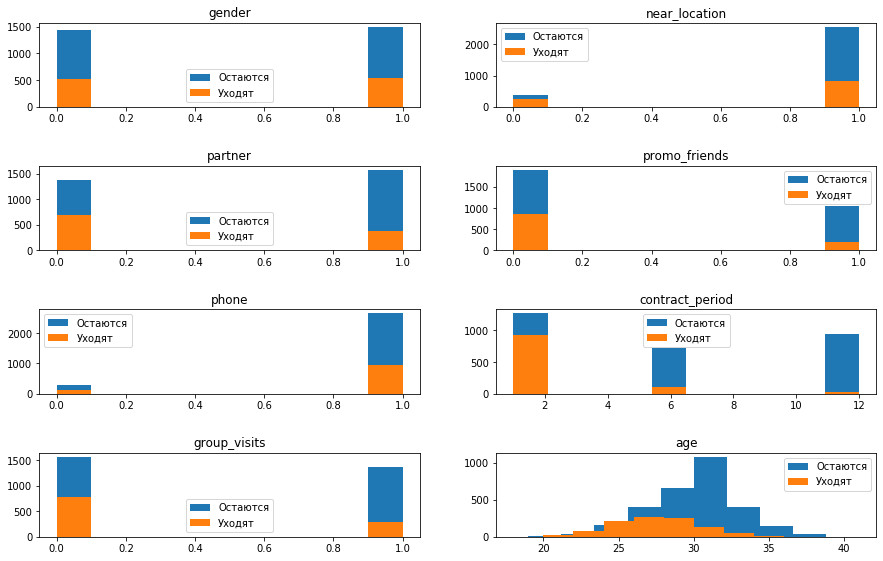

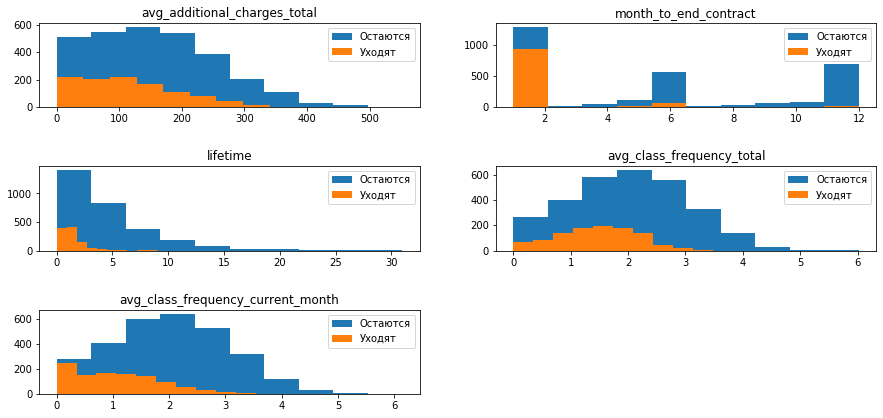

In [6]:
#построим в цикле графики для каждого признака с группировкой по целевой переменной churn
fig = plt.figure(figsize=(15,20))
fig.subplots_adjust(hspace=0.7)
for row in zip(list(gym.columns[:8]), [ 821+ x*1 for x in range(8)]):
    object = row[0]
    subplot = row[1]
    ax2 = fig.add_subplot(subplot)
    plt.hist(gym[gym['churn'] == 0][object], label = 'Остаются')
    plt.hist(gym[gym['churn'] == 1][object], label = 'Уходят')
    plt.title(object)
    plt.legend()
    
fig = plt.figure(figsize=(15,20))
fig.subplots_adjust(hspace=0.7)
for row in zip(list(gym.columns[8:]), [ 821+ x*1 for x in range(5)]):
    object = row[0]
    subplot = row[1]
    ax2 = fig.add_subplot(subplot)
    plt.hist(gym[gym['churn'] == 0][object], label = 'Остаются')
    plt.hist(gym[gym['churn'] == 1][object], label = 'Уходят')
    plt.title(object)
    plt.legend()

    'gender' — пол, представлен двумя категориями, на графике видно, что распределение примерно поровну между мужчинами и женщинами
    
    'Near_Location' — проживание или работа в районе, где находится фитнес-центр, тоже две категории, где 1 указывает на близость клуба к дому или работе. Таких в нашей выборке большинство. Процент тех кто уходит гораздо меньше когда расположение фитнес центра рядом с работой или домом

    'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента). Тоже две категории и распределение на две примерно равные группы. Такие скидки также благотворно влияют на тот факт, что клиент остается

    Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента) Две категории, 1 говорит нам о том, что такая акция привела около четверти от общего числа клиентов. Распределение говорит о том, что придя в клуб по наводке друга вероятность ухода минимальны

    'Phone' — наличие контактного телефона, у подавляющего количества он указан

    'Age' — возраст клиентов, варьируется  от 20 до 40 лет, после 30 люди более осознанно подходят к решению воспользоваться услугами клуба и процент тех, кто уходит среди них гораздо ниже.
    
    'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах) Пик приходится на первые два месяца, чем дольше люди с клубом, тем меньше вероятность их ухода
    
    'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год). Абонементов на 1 месяц больше половины, примерно по четверти абонементов на 6 и 12 месяцев, абонемент на 3 месяца никто не выбирает. Почти все кто уходит брали абонемент на месяц.

    'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах). Распределение очень похоже на предыдущее. 

    'Group_visits' — факт посещения групповых занятий. Если человек ходит на групповые занятия, вероятность его ухода сильно меньше

    'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента. Чаще всего клиенты клуба совершают от 1 до 3 занятий в неделю. Видно что для тех кто уходит распределение сдвинуто влево, это говорит, что в среднем клиенты меньше занимались
    
    'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц. Здесь ещё заметней как количество занятий влияет на факт ухода.

    'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон. Видно, что распределение для обоих групп очень похоже, среди тех кто уходит совсем нету тех кто бы тратил огромные сумму на такие услуги. Значит такие услуги могут быть интересны и тем, кто в последующем может уйти
    
    'Churn' — факт оттока в текущем месяце, отток составляет около четверти от общего числа клиентов

<h3 style="color:green">Средние значения признаков
</h3>

Для большей наглядности рассмотрим средние значения признаков, чтобы оценить как эти признаки влияют на факт ухода клиента

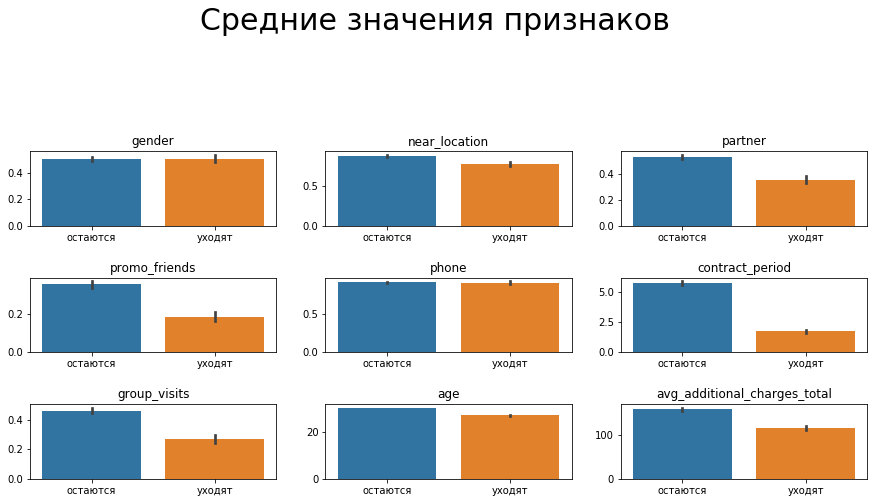

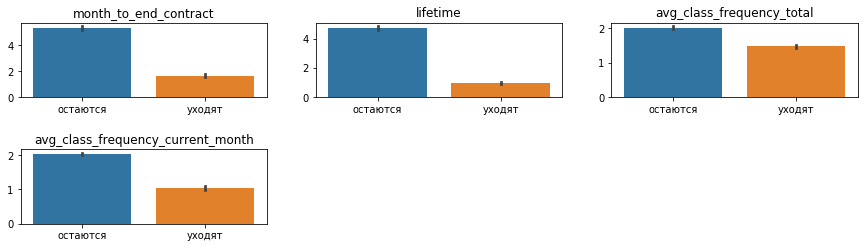

In [7]:
# В цикле построим графики, где высотой столбцов будет будут средние значения признака с группировкой по churn
gym.groupby('churn').mean()
fig = plt.figure(figsize=(15,20))
fig.subplots_adjust(hspace=0.7)
fig.suptitle('Средние значения признаков', fontsize=30)
for row in zip(list(gym.groupby('churn').mean().columns[:9]), [ 931+ x*1 for x in range(9)]):
    object = row[0]
    subplot = row[1]
    ax2 = fig.add_subplot(subplot)
    #plt.bar(x = gym.groupby('churn').mean().reset_index()['churn'],
            #height = gym.groupby('churn').mean()[object], color = ['blue','orange'])
    sns.barplot(x="churn", y= object, data=gym)
    plt.title(object)
    plt.xticks([0,1], labels = ['остаются','уходят'])
    plt.ylabel('')
    plt.xlabel('')
    
fig = plt.figure(figsize=(15,20))
fig.subplots_adjust(hspace=0.7)
for row in zip(list(gym.groupby('churn').mean().columns[9:]), [ 931+ x*1 for x in range(9)]):
    object = row[0]
    subplot = row[1]
    ax2 = fig.add_subplot(subplot)
#     plt.bar(x = gym.groupby('churn').mean().reset_index()['churn'],
#             height = gym.groupby('churn').mean()[object], color = ['blue','orange'])
    sns.barplot(x="churn", y= object, data=gym)
    plt.title(object)
    plt.xticks([0,1], labels = ['остаются','уходят'])
    plt.ylabel('')
    plt.xlabel('')

    средние значения признаков в двух группах - тех, кто ушёл в отток и тех, кто остался имеют ярковыраженные отличия в следующих признаках:
    
    1. Партнерская программа, процент клиентов, имеющих скидки на абонемент от компании в оттоке меньше, партнёрская программа хоть и немного, но помогает удержать клиента
    2. Промо акция "Приведи друга" даже в большей степени позволяет клиентов удержать. В оттоке процент таких клиенов в половину меньше
    3. Клиенты, кто ушёл в отток, как правило, имели абонемент на месяц, клиенты с абонементами на пол года и год остаются.
    4. Почти в два раза ниже средняя посещаемость групповых тренировок среди тех, кто ушел в отток
    5. Клиенты, кто ушёл в отток меньше тратят на другие виды услуг. В среднем на 20 процентов меньше
    6. Клиентов, у которых срок окончания абонемента больше чем через 1 месяц остаются, уходят те, у кого не сгорят неиспользованные месяцы абонемента
    7. Клиенты, из тех кто ушёл в отток, как правило, решают уйти в первый же месяц.
    8. Клиенты, которые остаются чаще занимаются в неделю
    9. Средняя частота посещение у тех кто остается в два раза выше по данным за прошлый месяц

<h3 style="color:green">Матрица кореляций
</h3>

Для оценки зависимости признаков между собой и на целевую переменную отобразим матрицу корреляций на графике

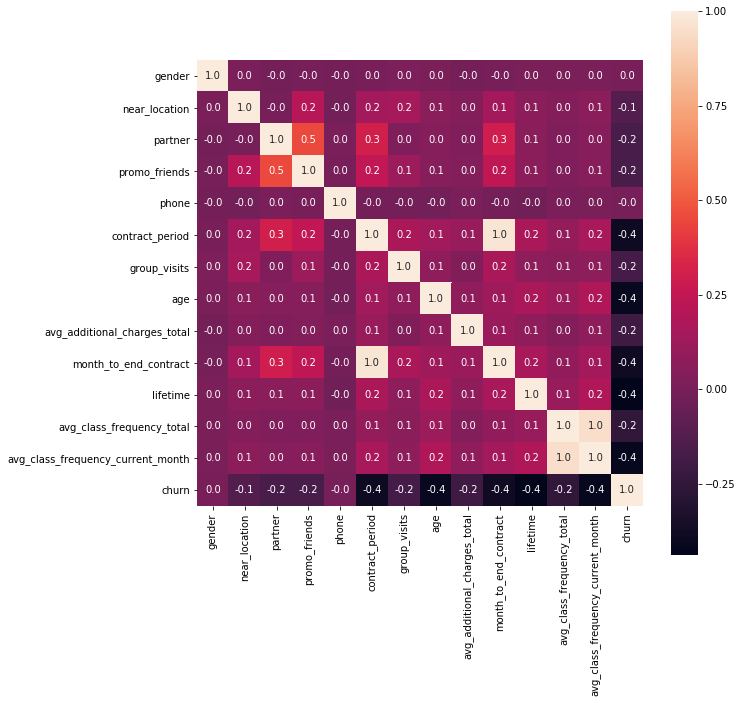

In [8]:
plt.figure(figsize=(10, 10))

ax = sns.heatmap(gym.corr(), square = True, annot = True, fmt='.1f')
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5) #устанавливаем границы вручную
plt.show()

    На построенном графике для оценки взаимосвязей признаков и целевой переменной показательным является последний столбец. В столбце присутствуют исключительные значения, это говорит об обратной зависимости, чем выше значение признака, тем ниже значение переменной. Целевая переменная 'churn' принимает значение 0 если клиент остается и значение 1 если клиент уходит, значит отрицательные значения  в столбце churn говорят нам, что для всех признаков верно: чем больше значение признака, тем меньше вероятность ухода клиента, т.е. значения 0 для нашей целевой переменной.
    
    Выделить значимую связь можно для следующих признаков:
    
    1. contract period(-0.39)
    2. age(-0.40)
    3. Month_to_end_contract(-0.38)
    4. lifetime (-0.44)
    5. Avg_class_frequency_total (-0.25)
    6. Avg_class_frequency_current_month (-0.44)
    
    
    Из этих 6 признаков у двух пар очень высокая корреляция между собой и необходимо выбрать один для дальнейшей работы.
    
    Так для пары contract period(-0.39) и Month_to_end_contract(-0.38), которые имеют коэффициент корреляции 0.97, будет целесообразно оставить только contract period, такой признак больше говорит о клиенте. Люди, покупающие абонемент на 1 месяц не уверены в приобретаемом продукте и велика вероятность их отказа. Наоборот, 1 месяц до окончания срока действия абонемента может не говорить о том, что в течение этого последнего месяца абонемент не будет продлён
    
    Для пары Avg_class_frequency_total (-0.25) и Avg_class_frequency_current_month (-0.44) с коэф. корреляции 0.95 будет информативней оставить Avg_class_frequency_current_month, этот признак точней говорит о текущей ситуации у клиента и его взаимодействии с сервисом, кроме того, у этого признака сильней взаимосвязь с целевой переменной.
    
    
    
    Среди признаков также стоит отметить низкую корреляцию для Phone, этот и предыдущие графики говорят о том, что наличие телефона ни на что не влияет и скорей всего является обязательным условием для большинства клиентов судя по распределению признака.
    
    Также пол не влияет на тот факт останется клиент или нет

<h3 style="color:green">Матрица корреляций по выбранным признакам
</h3>

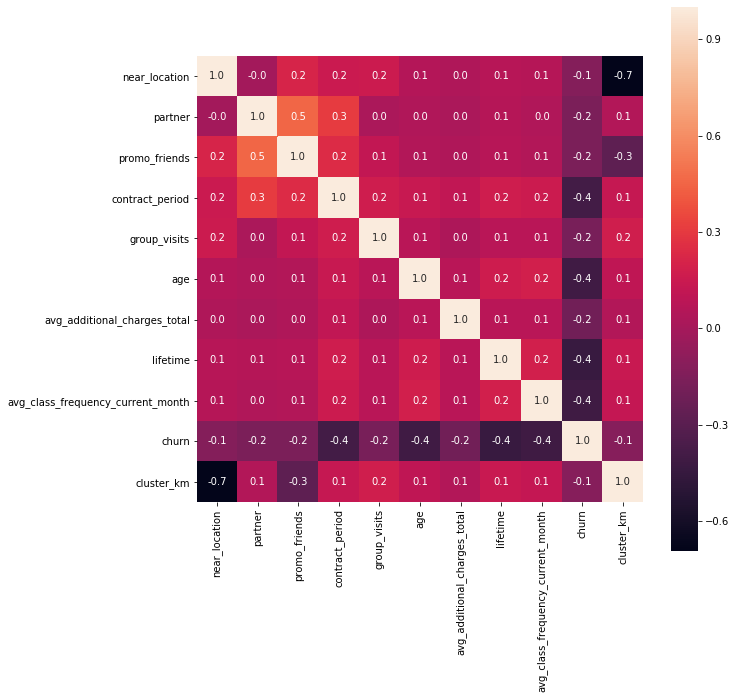

In [24]:
plt.figure(figsize=(10, 10))
fig.subplots_adjust(hspace=1)
ax = sns.heatmap(gym.drop(['phone','avg_class_frequency_total','month_to_end_contract','gender'],axis =1).corr(),
            square = True, annot = True, fmt='.1f')
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5) #устанавливаем границы вручную
plt.show()

<h3 style="color:green">Модель прогнозирования оттока пользователей
</h3>

<h4 style="color:green">Деление данных на тестовую и проверочную выборки
</h4>

В данных нет привязки ко времени, так как данные представлены за один месяц и каждая запись является уникальной и независимой. Такие данные можно разбивать случайным образом

In [10]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y), убираем столбцы, которые 
# не имеют влияния на целевую переменную или имеют сильную зависимость от других аналогичных признаков,
# такие признаки являются избыточными и только помешают эффективно обучить модель
X = gym.drop(['phone','avg_class_frequency_total','month_to_end_contract','gender'],
              axis =1).drop('churn', axis = 1)
y = gym['churn']

# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# обучаем StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# Преобразовываем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

<h3 style="color:green"> модель "логическая регрессия" и точность работы на валидационной выборке
</h3>

In [11]:
# задаём алгоритм логической регрессии для нашей модели, для повторяемости результата зафиксируем random_state
log_model = LogisticRegression(random_state=0)
# обучите модель
log_model.fit(X_train, y_train)
# воспользуйтесь уже обученной моделью, чтобы сделать прогнозы
log_predictions = log_model.predict(X_test)
log_probabilities = log_model.predict_proba(X_test)[:,1]
print('Точность определения целевой переменной на проверочной выборке :')
print('Accuracy(Доля правильных ответов): {:.2f}'.format(accuracy_score(y_test, log_predictions)))
print('Precision(Точность): {:.2f}'.format(precision_score(y_test, log_predictions)))
print('Recall(Полнота): {:.2f}'.format(recall_score(y_test, log_predictions)))
print('F1(баланс точности и полноты): {:.2f}'.format(f1_score(y_test, log_predictions)))
print('ROC_AUC(соотношение между долей объектов от общего количества носителей): {:.2f}'.format(roc_auc_score(y_test, log_probabilities)))

Точность определения целевой переменной на проверочной выборке :
Accuracy(Доля правильных ответов): 0.90
Precision(Точность): 0.79
Recall(Полнота): 0.79
F1(баланс точности и полноты): 0.79
ROC_AUC(соотношение между долей объектов от общего количества носителей): 0.96


C:\Users\Sergei\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<h3 style="color:green"> Функция от признаков модели "Логистической регрессии"
</h3>

In [12]:
#выведем на экран веса, которые модель логистической регрессии для себя определила
log_weights = pd.DataFrame(data = list(log_model.coef_), columns = X_train.columns).T.reset_index()
log_weights.columns = ['признак','вес']
log_weights.sort_values(by = 'вес').reset_index(drop = True)

,признак,вес
0,avg_class_frequency_current_month,-1.09
1,lifetime,-0.97
2,group_visits,-0.65
3,promo_friends,-0.50
4,contract_period,-0.27
5,age,-0.18
6,partner,-0.01
7,avg_additional_charges_total,-0.00
8,near_location,0.05


По весам модели мы можем сказать, что самым важным для модели являются:

1. Время, которое клиент с клубом
2. Длительность абонемента
3. Активность занятий в течение последнего месяца
4. Возраст клиента

<h3 style="color:green"> ансамбль моделей "Случайный лес" и точность работы на валидационной выборке
</h3>

In [13]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(random_state=0)
# обучим модель случайного леса
rf_model.fit(X_train, y_train)
# воспользуемся обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:,1]
print('Точность определения целевой переменной на проверочной выборке :')
print('Accuracy(Доля правильных ответов): {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision(Точность): {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall(Полнота): {:.2f}'.format(recall_score(y_test, rf_predictions)))
print('F1(баланс точности и полноты): {:.2f}'.format(f1_score(y_test, rf_predictions)))
print('ROC_AUC(соотношение между долей объектов от общего количества носителей): {:.2f}'.format(roc_auc_score(y_test, rf_probabilities)))

Точность определения целевой переменной на проверочной выборке :
Accuracy(Доля правильных ответов): 0.88
Precision(Точность): 0.77
Recall(Полнота): 0.70
F1(баланс точности и полноты): 0.74
ROC_AUC(соотношение между долей объектов от общего количества носителей): 0.93


C:\Users\Sergei\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


<h3 style="color:green">Корректировка предсказаний для проверочной выборки модели "Случайный лес" с помощью изменения порога для определения классов
</h3>

In [14]:
#попробовав несколько значений и подобрав оптимальное, установим порог для вероятности определения churn со значением 1
threshold = 0.4

custom_predictions = np.where(rf_model.predict_proba(X_test)[:,1] > threshold, 1, 0)
print('Точность определения целевой переменной на проверочной выборке :')
print('Accuracy(Доля правильных ответов): {:.2f}'.format(accuracy_score(y_test, custom_predictions)))
print('Precision(Точность): {:.2f}'.format(precision_score(y_test, custom_predictions)))
print('Recall(Полнота): {:.2f}'.format(recall_score(y_test, custom_predictions)))
print('F1(баланс точности и полноты): {:.2f}'.format(f1_score(y_test, custom_predictions)))
print('ROC_AUC(соотношение между долей объектов от общего количества носителей): {:.2f}'.format(roc_auc_score(y_test, rf_probabilities)))

Точность определения целевой переменной на проверочной выборке :
Accuracy(Доля правильных ответов): 0.88
Precision(Точность): 0.75
Recall(Полнота): 0.78
F1(баланс точности и полноты): 0.77
ROC_AUC(соотношение между долей объектов от общего количества носителей): 0.93


<h3 style="color:green">Сравнение результатов моделей

In [15]:
model_index = ['Доля правильных ответов','Точность',
               'Полнота','баланс точности и полноты','соотношение между долей объектов от общего количества носителей']
model_accuracy = [
    [accuracy_score(y_test, log_predictions),accuracy_score(y_test, rf_predictions),accuracy_score(y_test, custom_predictions)],
    [precision_score(y_test, log_predictions),precision_score(y_test, rf_predictions),precision_score(y_test, custom_predictions)],
    [recall_score(y_test, log_predictions),recall_score(y_test, rf_predictions),recall_score(y_test, custom_predictions)],
    [f1_score(y_test, log_predictions),f1_score(y_test, rf_predictions),f1_score(y_test, custom_predictions)],
    [roc_auc_score(y_test, log_probabilities),roc_auc_score(y_test, rf_probabilities),roc_auc_score(y_test, rf_probabilities)]
]
model_columns = ['Лог. регрессия',"Случайный лес(default)","Cлучайный лес(custom)"]
df_accuracy = pd.DataFrame(data = model_accuracy, index = model_index, columns = model_columns)
df_accuracy

,Лог. регрессия,Случайный лес(default),Cлучайный лес(custom)
Доля правильных ответов,0.90,0.88,0.88
Точность,0.79,0.77,0.75
Полнота,0.79,0.70,0.78
баланс точности и полноты,0.79,0.74,0.77
соотношение между долей объектов от общего количества носителей,0.96,0.93,0.93


<h3 style="color:green">Матрица ошибок
</h3>

In [16]:
matrix = [
 list(confusion_matrix(y_test,log_predictions).ravel()),
list(confusion_matrix(y_test,rf_predictions).ravel()),
list(confusion_matrix(y_test,custom_predictions).ravel())]

pd.DataFrame(data = matrix, index = ['Лог. регрессия','Случайный лес(default)','Cлучайный лес(custom)'],
             columns = ['True_negative','False_Negative','False_positive','True_positive'])

,True_negative,False_Negative,False_positive,True_positive
Лог. регрессия,559,43,41,157
Случайный лес(default),561,41,59,139
Cлучайный лес(custom),550,52,43,155


<h3 style="color:green">Выводы по оценке моделей
</h3>

- По всем метрикам модель логистической регрессии лучше определяет значения целевой переменной
- На матрице ошибок видно, что модель случайного леса чаще ошибается при определении клиентов, которые уходят
- Изменение порога для классификации не помогает сделать модель лучше модели логистической регрессии

    Результаты логистической регрессии лучше интерпритируются за счет возможности оценить веса для признаков, назначенные моделью.
    В целом веса согласовываются с результатами предварительного анализа, определёнными в процессе 'EDA'

<h3 style="color:green">Кластеризация пользователей
</h3>

<h3 style="color:green">Стандартизированная матрица признаков
</h3>

In [17]:
#в случае с кластеризацией делить выборку не нужно
sc = StandardScaler()
x_sc = sc.fit_transform(X)

linked = linkage(x_sc, method = 'ward')

<h3 style="color:green">Дендрограмма на стандартизированной матрице
</h3>

In [18]:
#код требует времени для отрисовки, для оперативной работы jupiter notebook после оценки графика код закомментирован
# plt.figure(figsize=(15, 10))  
# dendrogram(linked, orientation='top')
# plt.title('Hierarchial clustering for GYM')
# plt.show()

Дендрограмма показывает, что клиентов по признакам можно разделить на 2, 3, 5 и  7 кластеров. 

Большое количество позволит лучше разделить клиентов на группы, но в таком сегменте как фитнес это может оказаться избыточным и, наоборот, может исказить портреты клиентов. 2 и 3 слишком мало, поэтому одним из оптимальных вариантов можно попробовать 5 кластеров.

<h3 style="color:green">Прогнозирование кластеров клиентов алгоритмом K-Means
</h3>

In [19]:
# определим функцию отрисовки графиков попарных признаков для кластеров
def show_clusters_on_plot(df, x_name,y_name, cluster_name):
    plt.figure(figsize = (10,10))
    sns.scatterplot(df[x_name], df[y_name],
           hue = df[cluster_name], palette = 'Paired'
       )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()


km = KMeans(n_clusters = 5) # задаём число кластеров, равное 5
labels = km.fit_predict(x_sc) # применяем алгоритм к данным и формируем вектор кластеров



# сохраняем метки кластера в поле нашего датасета
gym['cluster_km'] = labels

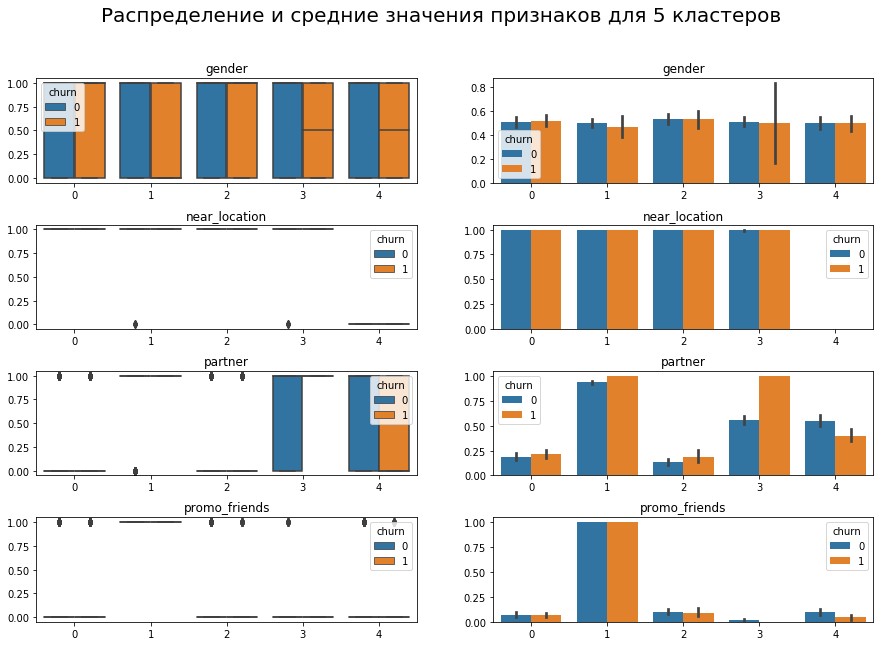

In [20]:
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.4)
fig.suptitle('Распределение и средние значения признаков для 5 кластеров', fontsize=20)
for row in zip(list(gym.drop('cluster_km', axis = 1).columns[0:4]), [ 421+ x*2 for x in range(4)]):
    object = row[0]
    subplot = row[1]
    fig.add_subplot(subplot)
    sns.boxplot(x = 'cluster_km', y = object, hue ='churn', data = gym)
    plt.title(object)
    plt.ylabel('')
    plt.xlabel('')
    
    fig.add_subplot(subplot + 1)
    sns.barplot(x="cluster_km", y= object, hue ='churn', data=gym)
    plt.title(object)
    plt.ylabel('')
    plt.xlabel('')

- Пол. Распределение одинаковое, средний соотношение тоже варьируется в небольшом диапазоне
- Расположение. Во всех группах кроме третьей преобладают клиенты, которые выбрали клуб рядом
- Партнёрская программа. Видно, что для второго кластера этот показатель максимальный, первый и третий равномерно распределены, а в 0 и 4 патнерской программой почти никто не воспользовался
- Промо друзей. Также в лидерах второй кластер, остальные имеют минимальную долю таких клиентов

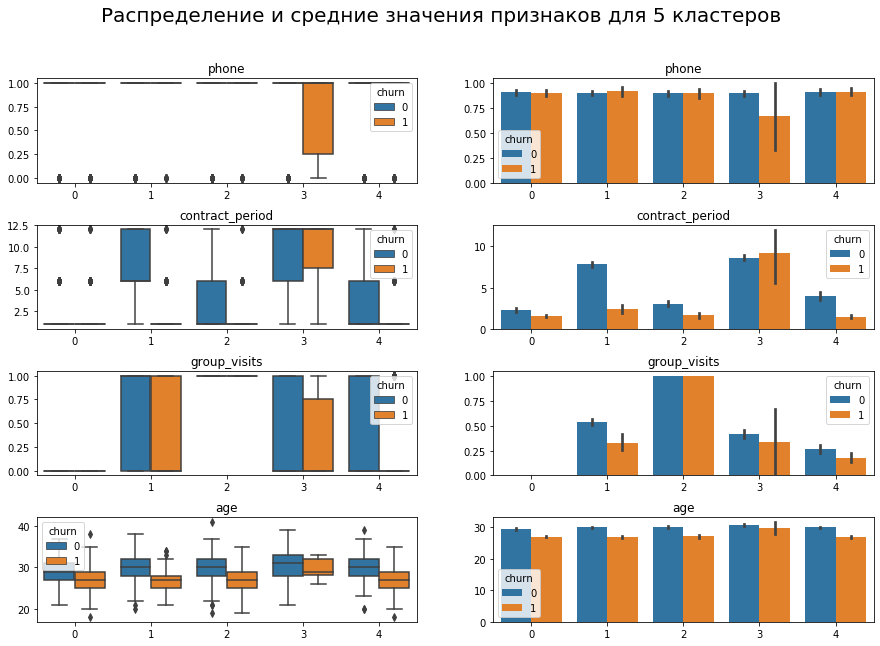

In [21]:
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.4)
fig.suptitle('Распределение и средние значения признаков для 5 кластеров', fontsize=20)
for row in zip(list(gym.drop('cluster_km', axis = 1).columns[4:8]), [ 421+ x*2 for x in range(4)]):
    object = row[0]
    subplot = row[1]
    fig.add_subplot(subplot)
    sns.boxplot(x = 'cluster_km', y = object, hue ='churn', data = gym)
    plt.title(object)
    plt.ylabel('')
    plt.xlabel('')
    
    fig.add_subplot(subplot + 1)
    sns.barplot(x="cluster_km", y= object, hue ='churn', data=gym)
    plt.title(object)
    plt.ylabel('')
    plt.xlabel('')

- Телефон есть у всех
- Текущий контракт максимальный в кластерах 1 и 2, в 0 и 3 эта величина примерно в два раза меньше, а в 4 кластере преобладают абонементы на месяц
- Групповые занятия. Самый групповой нулевой кластер, в 1 и 2 их примерно поровну, в 3 и 4 их почти нет
- Возраст, самое равномерное распределение в 1 кластере, в остальных видно, что уходят более молодые клиенты

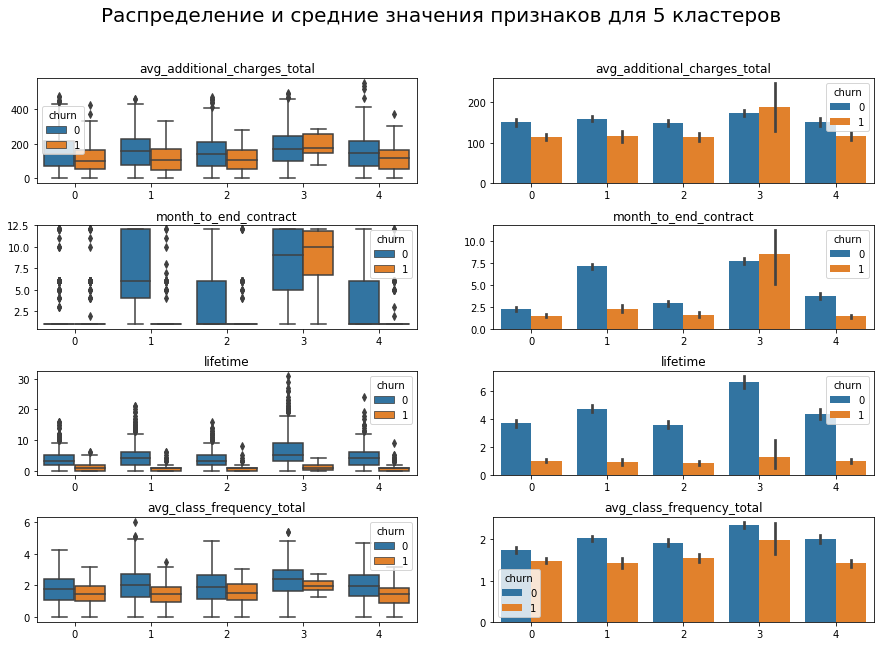

In [22]:
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.4)
fig.suptitle('Распределение и средние значения признаков для 5 кластеров', fontsize=20)
for row in zip(list(gym.drop('cluster_km', axis = 1).columns[8:12]), [ 421+ x*2 for x in range(4)]):
    object = row[0]
    subplot = row[1]
    fig.add_subplot(subplot)
    sns.boxplot(x = 'cluster_km', y = object, hue ='churn', data = gym)
    plt.title(object)
    plt.ylabel('')
    plt.xlabel('')
    
    fig.add_subplot(subplot + 1)
    sns.barplot(x="cluster_km", y= object, hue ='churn', data=gym)
    plt.title(object)
    plt.ylabel('')
    plt.xlabel('')

- Дополнительные расходы. Распределение равномерное, в первом кластере минимальный диапазон разброса средних дополнтильных расходов
- Месяцев до окончания абонемента. 4 кластер в основном из тех, у кого всего месяц занятий оплачен, лидеры 1 и 2, середина это 0 и 3
- Длительность обслуживания. Лидер 1, Остальные почти равномерно на втором месте. Во всех кластерах наблюдается отток в основном для новичков
- Средняя посещаемость клуба. В лидерах снова 1, но распределение равномерное, примерно 2 занятия в неделю.

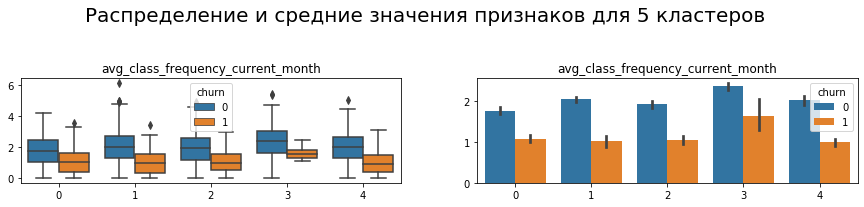

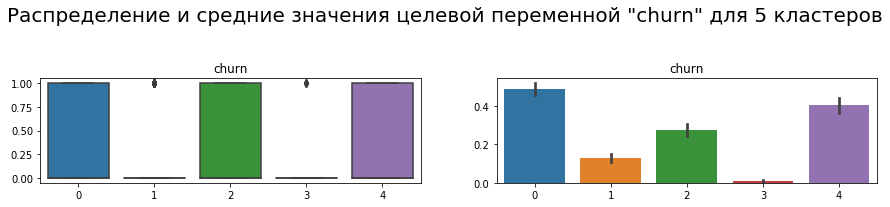

In [23]:
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.4)
fig.suptitle('Распределение и средние значения признаков для 5 кластеров', fontsize=20)
for row in zip(list(gym.drop('cluster_km', axis = 1).columns[12:13]), [ 421+ x*2 for x in range(4)]):
    object = row[0]
    subplot = row[1]
    fig.add_subplot(subplot)
    sns.boxplot(x = 'cluster_km', y = object, hue ='churn', data = gym)
    plt.title(object)
    plt.ylabel('')
    plt.xlabel('')
    
    fig.add_subplot(subplot + 1)
    sns.barplot(x="cluster_km", y= object, hue ='churn', data=gym)
    plt.title(object)
    plt.ylabel('')
    plt.xlabel('')
    
    
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.4)
fig.suptitle('Распределение и средние значения целевой переменной "churn" для 5 кластеров', fontsize=20)
for row in zip(list(gym.drop('cluster_km', axis = 1).columns[13:14]), [ 421+ x*2 for x in range(4)]):
    object = row[0]
    subplot = row[1]
    fig.add_subplot(subplot)
    sns.boxplot(x = 'cluster_km', y = object, data = gym)
    plt.title(object)
    plt.ylabel('')
    plt.xlabel('')
    
    fig.add_subplot(subplot + 1)
    sns.barplot(x="cluster_km", y= object, data=gym)
    plt.title(object)
    plt.ylabel('')
    plt.xlabel('')

- Активность в последний месяц. Лидер снова 1, во всех кластерах клиенты, которые уходят меньше посещают клуб в последний месяц
- В 1 и 2 кластерах минимальны случаи, когда клиент уходит, в 3 и 4 уходят почти половина, в 0 около четверти

    Оценив все графики с распределением значений признаков в различных кластерах можно выделить следующие, в которых наиболее заметны различия:
    
    1. Near location
    2. Partner
    3. Promo friends
    4. Contract period
    5. Group visits
    6. Month to end cotract
    7. Lifetime


<h3 style="color:green">Выводы
</h3>

Ещё раз повтрорим задачи, которые перед нами были посталены:

1) выделить целевые группы клиентов;

2) предложить меры по снижению оттока;

3) определить другие особенности взаимодействия с клиентами.


Основываясь на таких формулировках задач, можно сделать следующие выводы из результатов анализа:

1. Клиенты приобретающие абонемент на 1 месяц самая подверженная к оттоку группа клиентов

2. По сниженной активности клиента можно с высокой вероятностью прогнозировать отток

3. Воспользовавшись одной из программ, будь то "партнёрская" или "приведи друга" клиент с большей вероятностью остается

4. Молодые клиенты с большей вероятностью отказываются от услуг клуба


Решения, которые стоит принимать всегда лучше принимать в каждом конкретном случае на местах, где сотрудники взглянув на проанализированные данные смогут сделать более качественные выводы.

Если попытаться дать предварительные рекоммендациии, то они могут быть такими:

1. Стараться предлагать более длительные абонементы, используя различные методы такие как берите на 3 месяца со скидкой, если после 1го месяца вы решите отказаться мы вернем деньги и т.д. Всячески постараться задержать клиента, успеть сделать для него привычкой, постараться продемонстрировать за этот период больше услуг и преимуществ.
2. Чаще проводить акции на групповые занятия, воспользовавшись такими услугами, клиент с большей вероятностью остается
3. Скидки партнерской программы работают, нужно и дальше работать в этом направлении.
4. Клиенты старше 30 с большей вероятностью принимают взвешенное решение при покупке абонемента и остаются, стоит считать их своей первостепенной целевой аудиторией

<h3 style="color:green">Результат кластерного деления на группы
</h3>

Поделив клиентов на 5 различных групп мы получили следующую картину:
    
1. В 4 кластере клуб не находится рядом с клиентом
2. В 1 и 2 чаще других пользуются партнерскими программами, а еще чаще берут длительные абонементы
3. В 1 самый большой процент "Приведи друга"
4. В 1 и 2 клиенты, которые дольше других с клубом
5. В 0 популярны групповые занятия, а в 3 таких любителей почти нет


По показателю churn самыми ненадежными оказались клиенты 3 и 4 кластера, а кластеры с небольшой долей оттока 1 и 2.